In [11]:
import matplotlib.pyplot as plt
import mpltern
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('combo_FFT-K4.csv')
print(data)

     Sample     Prin1     Prin2     Prin3     Prin4
0        GA  0.019502  0.000903 -0.000251  0.003100
1        GA -0.003962 -0.008594  0.000567 -0.001282
2        GA  0.016758 -0.001718 -0.000056  0.002808
3        GA  0.016592  0.004832 -0.000393  0.004243
4        GA  0.013727 -0.005262 -0.001203  0.006433
...     ...       ...       ...       ...       ...
6537    CMP  0.006329 -0.000794  0.000057 -0.000534
6538    CMP  0.006429 -0.001482  0.000014 -0.000260
6539    CMP -0.002455 -0.000597  0.001621 -0.007712
6540    CMP  0.000824 -0.004093  0.000716 -0.004788
6541    CMP  0.012850  0.001550 -0.000238  0.001246

[6542 rows x 5 columns]


In [38]:
GA = (data.Sample == 'GA')
CMP = (data.Sample == 'CMP')
GA_particles = data.drop(data[CMP].index)
CMP_particles = data.drop(data[GA].index)


In [12]:
vmin = 0.0
vmax = 1.2
levels = np.linspace(vmin, vmax, 7)

/Users/langdonfeltner/projects_sandbox/ParticlePy/ParticlePy/.conda/lib/python3.11/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


RuntimeError: Error in qhull Delaunay triangulation calculation: input inconsistency (exitcode=1); use python verbose option (-v) to see original qhull error.

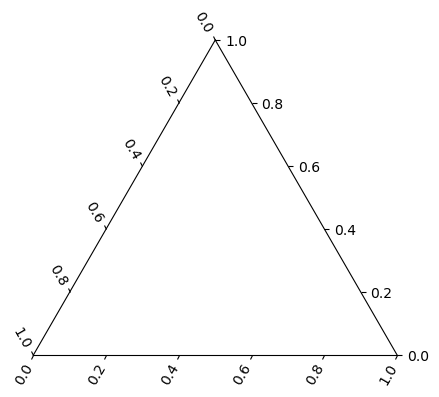

In [14]:
fig = plt.figure(figsize=(10.8, 4.8))
fig.subplots_adjust(left=0.075, right=0.85, wspace=0.3)
vmin = 0.0
vmax = 1.2
levels = np.linspace(vmin, vmax, 7)

ax = fig.add_subplot(1, 2, 1, projection='ternary')
cs = ax.tripcolor(data.Prin1[GA], data.Prin2[GA], data.Prin3, data.Prin4, shading='flat', vmin=vmin, vmax=vmax)
ax.set_title("tripcolor(shading='flat')")


# ax = fig.add_subplot(1, 2, 1, projection="ternary")
# pc = ax.tripcolor(data.Prin1, data.Prin2, data.Prin3, data.Prin4)
# pc = ax.scatter(t1, l1, r1)

RuntimeError: Error in qhull Delaunay triangulation calculation: input inconsistency (exitcode=1); use python verbose option (-v) to see original qhull error.

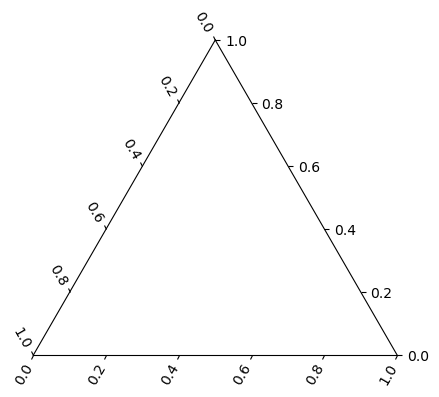

In [23]:
import numpy as np

import matplotlib.pyplot as plt
from mpltern.datasets import get_shanon_entropies

t, l, r, v = get_shanon_entropies()

fig = plt.figure(figsize=(10.8, 4.8))
fig.subplots_adjust(left=0.075, right=0.85, wspace=0.3)

# These values are for controlling the color-bar scale, and here they are
# explicitly given just to make the same color-bar scale for all the plots.
# In general, you may not need to explicitly specify them.
vmin = 0.0
vmax = 1.2
levels = np.linspace(vmin, vmax, 7)

ax = fig.add_subplot(1, 2, 1, projection='ternary')
cs = ax.tricontour(data.Prin1, data.Prin2, data.Prin3, levels=levels)
ax.clabel(cs)
ax.set_title("tricontour")

cax = ax.inset_axes([1.05, 0.1, 0.05, 0.9], transform=ax.transAxes)
colorbar = fig.colorbar(cs, cax=cax)
colorbar.set_label('Entropy', rotation=270, va='baseline')

# ax = fig.add_subplot(1, 2, 2, projection='ternary')
# cs = ax.tricontourf(t, l, r, v, levels=levels)
# ax.set_title("tricontourf")

# cax = ax.inset_axes([1.05, 0.1, 0.05, 0.9], transform=ax.transAxes)
# colorbar = fig.colorbar(cs, cax=cax)
# colorbar.set_label('Entropy', rotation=270, va='baseline')

plt.show()



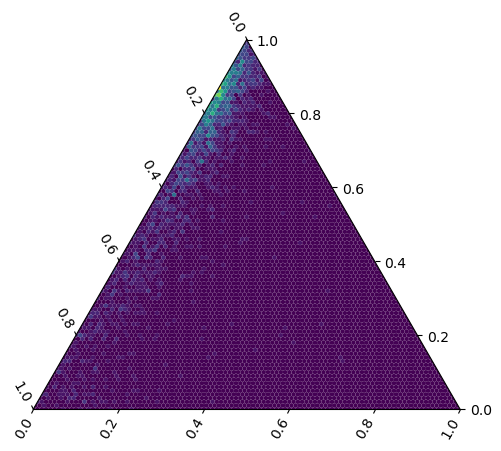

In [36]:
ax = plt.subplot(projection="ternary")

# If "edgecolors=face" (default), small hexagons look overlapping.
ax.hexbin(data.Prin1[GA], data.Prin2[GA], data.Prin3[GA], edgecolors="none")

plt.show()

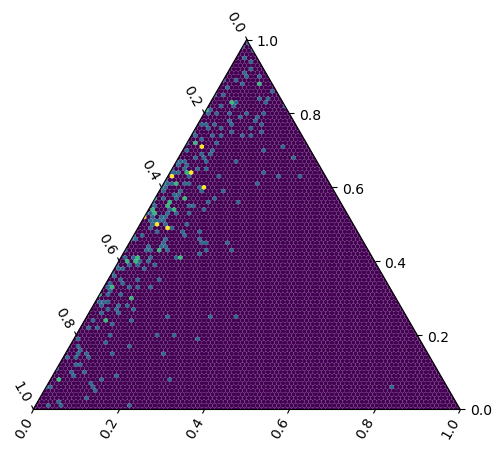

In [35]:
ax = plt.subplot(projection="ternary")

# If "edgecolors=face" (default), small hexagons look overlapping.
ax.hexbin(data.Prin1[CMP], data.Prin2[CMP], data.Prin3[CMP], edgecolors="none")

plt.show()

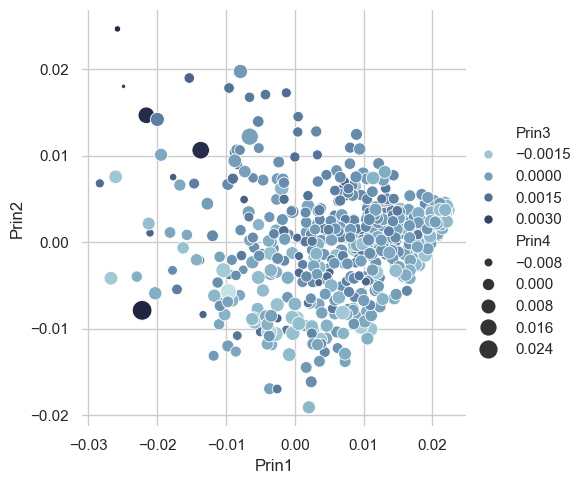

In [41]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=GA_particles[::10],
    x="Prin1", y="Prin2",
    hue="Prin3", size="Prin4",
    palette=cmap, sizes=(10, 200),
)
# g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

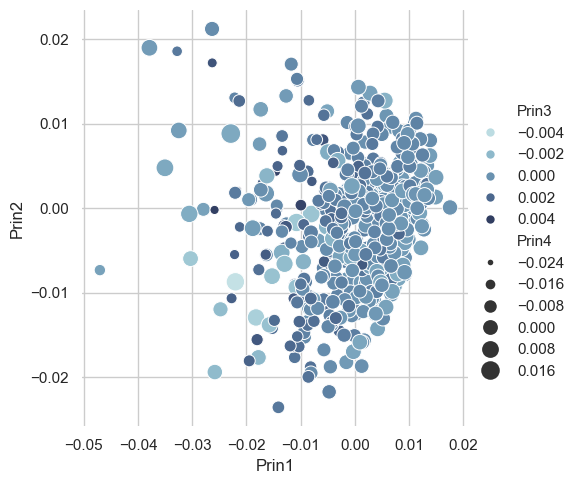

In [42]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=CMP_particles[::2],
    x="Prin1", y="Prin2",
    hue="Prin3", size="Prin4",
    palette=cmap, sizes=(10, 200),
)
# g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

(-0.03, 0.03)

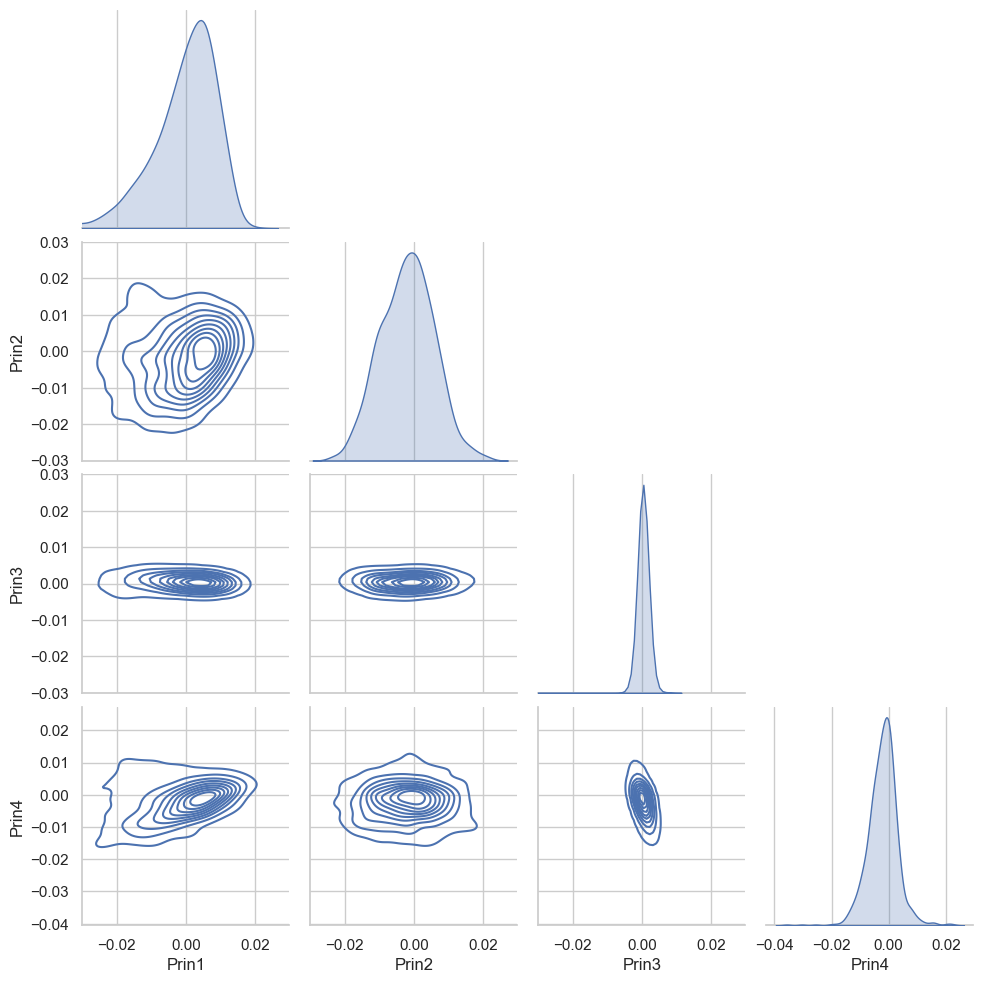

In [104]:
g = sns.pairplot(CMP_particles, kind='kde', corner=True)
g.axes[0,0].set_xlim(-0.03,0.03)
g.axes[0,0].set_ylim(-0.03,0.03)
g.axes[1,0].set_xlim(-0.03,0.03)
g.axes[1,0].set_ylim(-0.03,0.03)
g.axes[1,1].set_xlim(-0.03,0.03)
g.axes[1,1].set_ylim(-0.03,0.03)
g.axes[2,0].set_xlim(-0.03,0.03)
g.axes[2,0].set_ylim(-0.03,0.03)
g.axes[2,1].set_xlim(-0.03,0.03)
g.axes[2,1].set_ylim(-0.03,0.03)
g.axes[2,2].set_xlim(-0.03,0.03)
g.axes[2,2].set_ylim(-0.03,0.03)
# g.axes[:,:].set_ylim(-0.03,0.03)


(-0.005, 0.005)

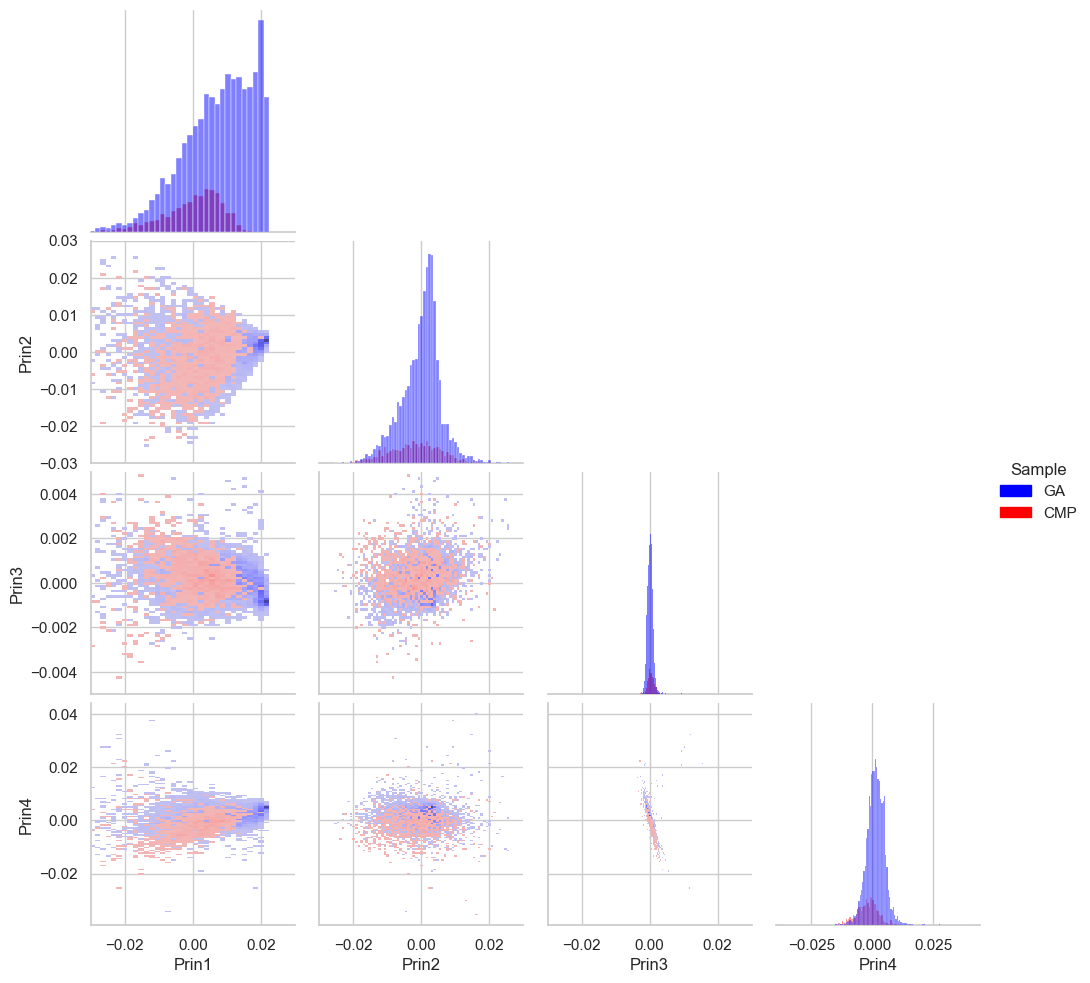

In [162]:
sns.set_theme(style="whitegrid")
g = sns.pairplot(data, kind='hist', corner=True, diag_kind='hist', hue='Sample', palette=['blue', 'red'])
g.axes[0,0].set_xlim(-0.03,0.03)
g.axes[1,1].set_xlim(-0.03,0.03)
g.axes[1,1].set_ylim(-0.03,0.03)
g.axes[2,0].set_xlim(-0.03,0.03)
g.axes[2,0].set_ylim(-0.03,0.03)
g.axes[2,1].set_xlim(-0.03,0.03)
g.axes[2,1].set_ylim(-0.03,0.03)
g.axes[2,2].set_xlim(-0.03,0.03)
g.axes[2,2].set_ylim(-0.005,0.005)



(-0.005, 0.005)

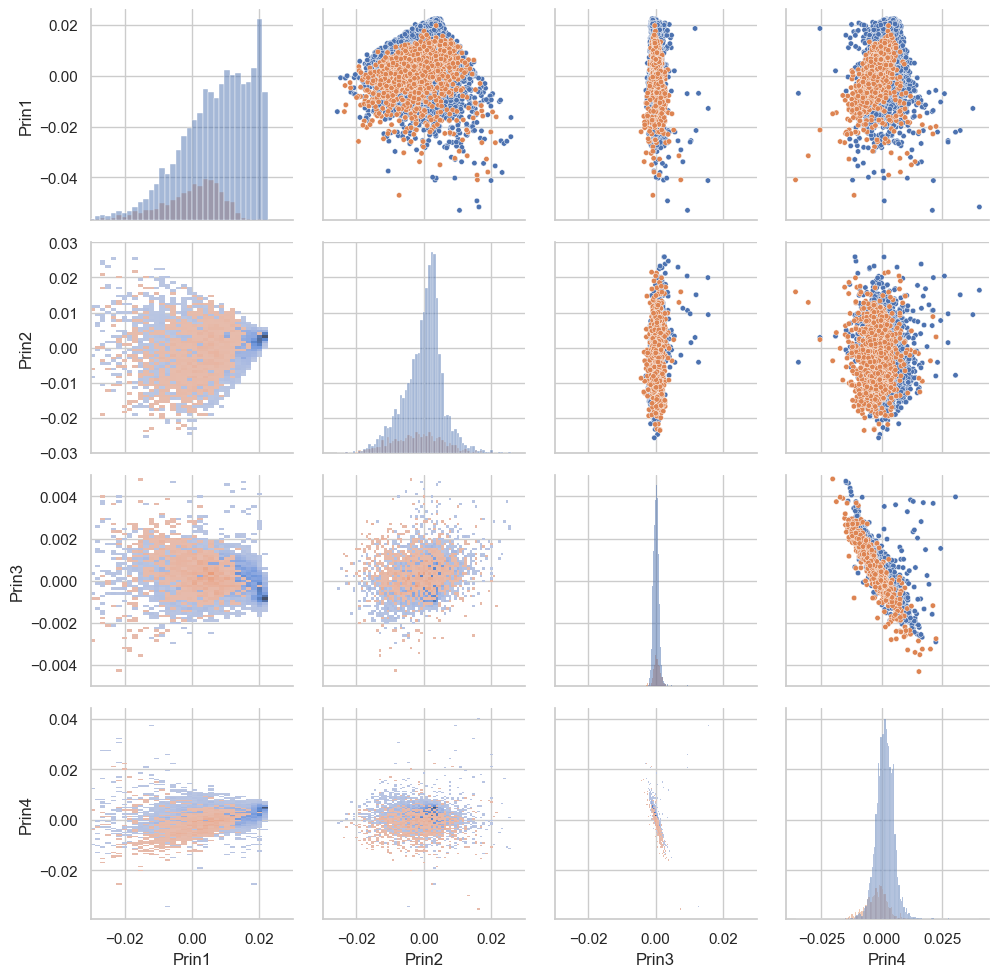

In [180]:
g = sns.PairGrid(data,hue='Sample', diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.histplot, stat = 'proportion')
g.map_diag(sns.histplot, stat = 'proportion', lw=2)
g.axes[0,0].set_xlim(-0.03,0.03)
g.axes[1,1].set_xlim(-0.03,0.03)
g.axes[1,1].set_ylim(-0.03,0.03)
g.axes[2,0].set_xlim(-0.03,0.03)
g.axes[2,0].set_ylim(-0.03,0.03)
g.axes[2,1].set_xlim(-0.03,0.03)
g.axes[2,1].set_ylim(-0.03,0.03)
g.axes[2,2].set_xlim(-0.03,0.03)
g.axes[2,2].set_ylim(-0.005,0.005)

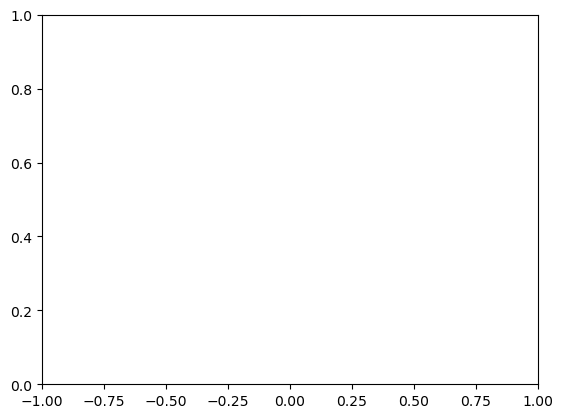

<Figure size 1280x960 with 0 Axes>

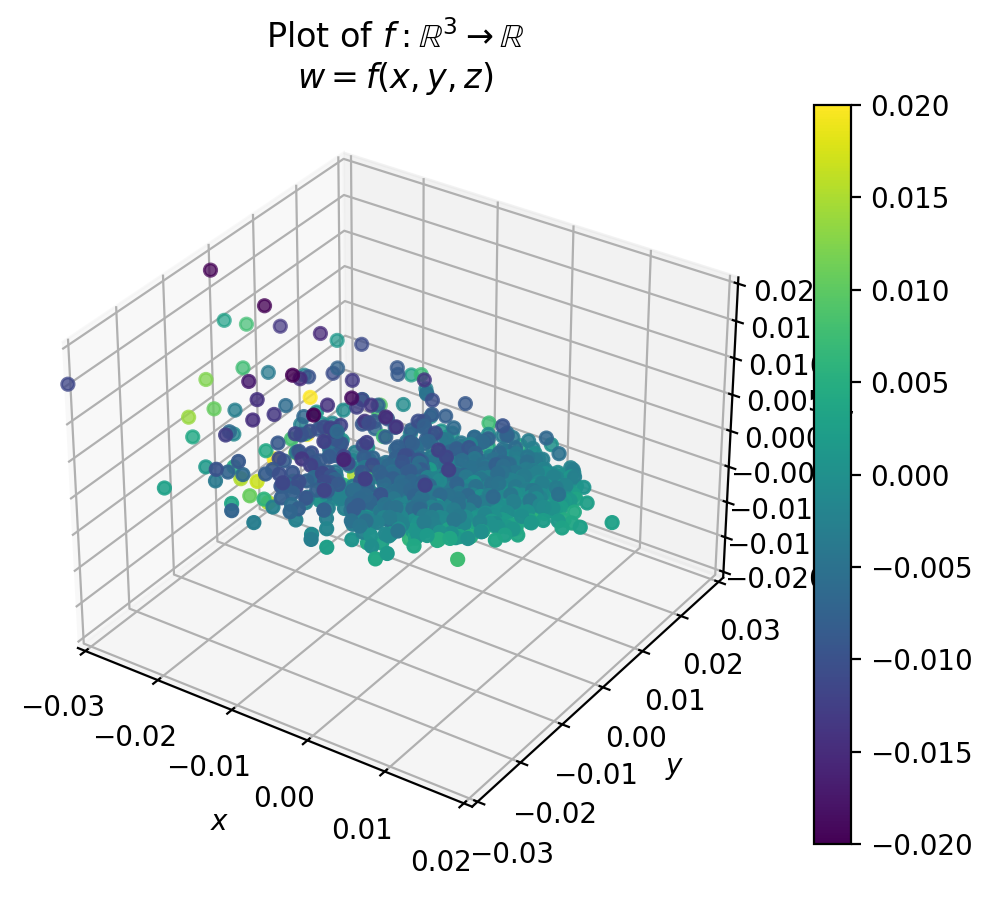

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from matplotlib.colors import ListedColormap

## The following code creates the figure plotting function
def MakePlot(xx,yy,zz,ww,cmapO=cm.viridis): 
    ##Create Custom Colormap with Alpha varying depending on the functions behavior. 
    ## This produces very nice isovolume plots similar to Mayavi and OpenCV
    
    ##Preallocate new colormap
    my_cmapN=cmapO(np.arange(cmapO.N))
    
    #set Alpha of new colormap to be small in the middle of the colormap range using a bump function
    # this can be changed to emphasize different areas of the range that are of interest.   
    nA=cmapO.N    
    xA=np.linspace(-0.04,0.04,nA)
    epsilon=0.0001 #Width of range to exclude from alpha channel
    x_0=0#Center of range to exclude from alpha channel
    
    def f_AlphaControl(x):
        u=(x-x_0)/epsilon
        return 1-np.exp(-u**2/(1-u**2))*(np.abs(u)<1.)

    yA=f_AlphaControl(xA) 
    plt.plot(xA,f_AlphaControl(xA))
    plt.xlim([-1,1])
    plt.ylim([0,1])
   
    my_cmapN[:,-1]=yA
    
    fig = plt.figure(dpi=200) 
    
    # Create new colormap
    my_cmap = ListedColormap(my_cmapN) 
    
    
    plt.style.use('default')
    fig = plt.figure(dpi=200) 
    ax = fig.add_subplot(projection='3d')
    points=ax.scatter(xx,yy,zz,c=ww,cmap=my_cmap)   
    cbar=fig.colorbar(points)
    cbar.mappable.set_clim(vmin=-0.02,vmax=0.02)
    # cbar.solids.set_rasterized(True)
    
    cbar.set_alpha(1)
    # cbar.draw_all()
    
    ## Make Title for plot
    ax.set_title(r'Plot of $f:\mathbb{R}^3\rightarrow \mathbb{R}$'+'\n'+r'$w=f(x,y,z)$')
      
    ##Plot x, y, and z axis useful for visual referencing when viewing the plot
    eps=.3
    tt=np.linspace(-(1+eps)*L,(1+eps)*L,2)
    # ax.plot(tt,0*tt,0*tt,c='magenta',linewidth=2);
    # ax.plot(0*tt,tt,0*tt,c='magenta',linewidth=2);
    # ax.plot(0*tt,0*tt,tt,c='magenta',linewidth=2)
      
    ## Set viewing angle
    xang=-56;pang=32;
    ax.view_init(pang, xang)
    
    # Set axis limits
    ax.set_xlim([-0.03,0.02]);ax.set_ylim([-0.03,0.03]);ax.set_zlim([-0.02,0.02]);
       
    #Set axis labels
    ax.set_xlabel('$x$');ax.set_ylabel('$y$');ax.set_zlabel('$z$')
    # plt.savefig("ScatterPlotVaryingAlpha.png",dpi=200)


MakePlot(CMP_particles.Prin1, CMP_particles.Prin2, CMP_particles.Prin3, CMP_particles.Prin4)

# if __name__ == "__main__":

#     #Set Plot Grid 
    
#     L=1.5
#     x_C=0.0;y_C=0.0;z_C=0.0;
#     # Set XYZ Plotting Grid
#     a1=x_C-L;b1=x_C+L;
#     a2=y_C-L;b2=y_C+L;
#     a3=z_C-L;b3=z_C+L;
    
#     n=30;
#     NT=n**3
    
    
    
#     ##The following if statement determines whether you want to use a random grid R=1 
#     ## or a uniform grid R=0
    
#     grid_flag=1
    
#     if grid_flag==1:
#        ## Random Grid
#        xx=np.random.uniform(a1,b1,NT);
#        yy=np.random.uniform(a2,b2,NT);
#        zz=np.random.uniform(a3,b3,NT)
#     else:
#         ## Even Grid
#         x = np.linspace(a1,b1,n);
#         y = np.linspace(a2,b2,n);
#         z = np.linspace(a3,b3,n);
    
#         X, Y, Z = np.meshgrid(x, y, z, indexing='ij', sparse=False)
        
#         xx=X.reshape(X.size);yy=Y.reshape(Y.size);zz=Z.reshape(Z.size);
    
    
    
#     ## The following code defines the function of 3 variables that we wish to visualize
#     ## This can be replaced with the flattened data array that you wish to plot
    
#     def f(x,y,z):
#         return x*y*z*np.exp(-(x**2+y**2+z**2))
    
#     ww=f(xx,yy,zz)
#     ww[np.isinf(ww)]=np.nan
    
  
#     MakePlot(xx,yy,zz,ww)
#     plt.show()